# Grating Design Calculations

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Single grating

<img src="img/diffractionGrating1.png" alt="Drawing" style="width: 400px;"/>

Reference: Author Affiliations +
Optical Engineering, 58(8), 087105 (2019). https://doi.org/10.1117/1.OE.58.8.087105

The Goal is to establish how much small feature size is needed for 1 nm separation at 10 cm first with a single diffuser, and then with dual. 

The diffraction grating equation is: 
$$ d \sin \theta = m \lambda $$

Focusing through a lens (or propagation of narrow beam) turns angle into spatial coordinate:
$$ L \tan \theta = x $$

Let's look at the diffraction and propagation from two incident plane waves near 830 nm. 

<img src="img/singeGrating.png" alt="Drawing" style="width: 400px;"/>


In [143]:
d = 1e-6 # 1 micron
m = 1 # diffraction order = 1
lambda_1 = 830e-9 # default: 830 nm
dlambda = 1e-9 # default: 0.1 nm
lambda_2 = lambda_1 + dlambda

print('For 830 nm and 831 nm:')
theta1 = np.arcsin(m*lambda_1/d)
theta2 = np.arcsin(m*lambda_2/d)
print(np.degrees(theta1), np.degrees(theta2))

L = 2e-2 # 1 cm
w1 = L*np.tan(theta1)
w2 = L*np.tan(theta2)

print(w1*1e3, w2*1e3)

pixelpitch =10e-6 # 10 microns
numpix = (w2-w1)/pixelpitch

print(numpix)

res = dlambda/numpix

print(res*1e9)

For 830 nm and 831 nm:
56.09873800313375 56.20159962358991
29.761723836525896 29.87744770999136
11.572387346546474
0.08641259318877087


Looks like we actually can get <0.2 nm resolution with just 1 cm of propagation or focal length (given 5 micron pixels).  

But remember this assumes a delta function for the entrance slit. Typically the entrance slit is ~100 $\mu$m wide (acts as lowpass filter). And so we need higher separation between wavelengths to be able to resolve them. (Unless they are sparse and can just be localized)
Also higher diffraction orders creates more difference in $\theta$


Now let's look at the full desired range from 780-880 nm

Text(0.5, 1.0, '1st order diffraction from Transmissive Grating (1 $\\mu$m pitch)')

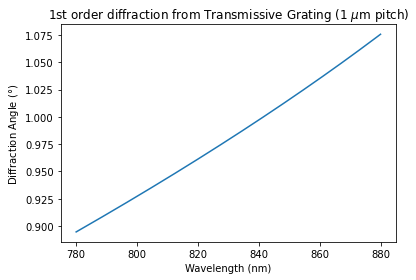

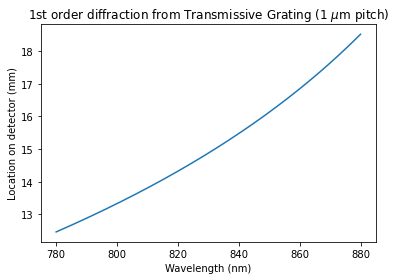

In [19]:
d = 1e-6 # 1 micron
m = 1 # diffraction order = 1
L = 1e-2 # 1 cm

lambda_st = 780e-9 # default: 830 nm
dlambda = 0.1e-9 # default: 0.1 nm
lambda_end = 880e-9
lam = np.arange(lambda_st,lambda_end, dlambda)
thet =np.arcsin(m*lam/d)

plt.plot(lam*1e9, thet)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Diffraction Angle ($\degree$)')
plt.title('1st order diffraction from Transmissive Grating (1 $\mu$m pitch)')

w = L*np.tan(thet)
plt.figure()
plt.plot(lam*1e9, w*1e3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Location on Detector (mm)')
plt.title('1st order diffraction from Transmissive Grating (1 $\mu$m pitch)')

And again for the IR (1300 nm)

Text(0.5, 1.0, '1st order diffraction from Transmissive Grating (1.5 $\\mu$m pitch)')

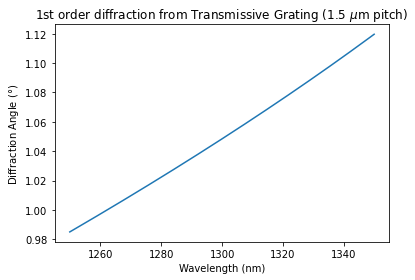

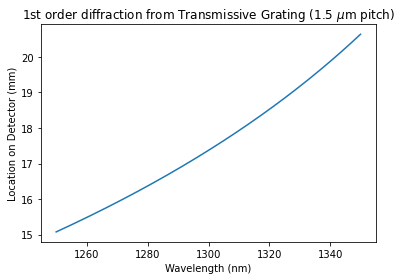

In [21]:
d =1.5e-6 # 1 micron
m = 1 # diffraction order = 1
L = 1e-2 # 1 cm

lambda_st = 1250e-9 # default: 830 nm
dlambda = 0.1e-9 # default: 0.1 nm
lambda_end = 1350e-9
lam = np.arange(lambda_st,lambda_end, dlambda)
thet =np.arcsin(m*lam/d)

plt.plot(lam*1e9, thet)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Diffraction Angle ($\degree$)')
plt.title('1st order diffraction from Transmissive Grating (1.5 $\mu$m pitch)')

w = L*np.tan(thet)
plt.figure()
plt.plot(lam*1e9, w*1e3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Location on Detector (mm)')
plt.title('1st order diffraction from Transmissive Grating (1.5 $\mu$m pitch)')

Now let's look at graphs of how 1st order diffraction angle relates to grating pitch

And how the nm/pixel value changes with propagation distance. 

These will help with some intuitive relations

Text(0.5, 1.0, 'Resolution vs feature size (10 $\\mu$m pixels)')

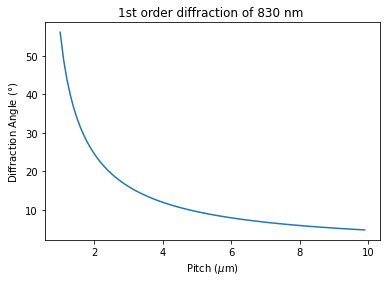

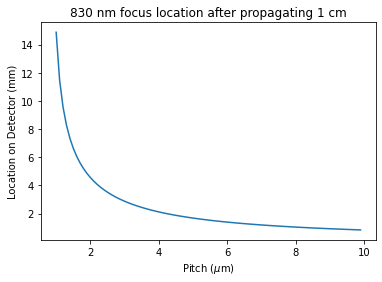

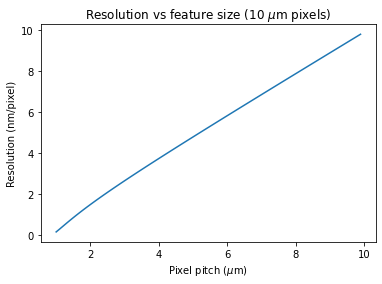

In [25]:
d = np.arange(1e-6,1e-5,1e-7)
m = 1 # diffraction order = 1
lambda_1 = 830e-9 # 830 nm

theta1 = np.arcsin(m*lambda_1/d)

plt.plot(d*1e6,np.degrees(theta1))
plt.xlabel('Pitch ($\mu$m)')
plt.ylabel('Diffraction Angle ($\degree$)')
plt.title('1st order diffraction of 830 nm ')

L = 1e-2
w = L*np.tan(theta1)

plt.figure()
plt.plot(d*1e6,w*1e3)
plt.xlabel('Pitch ($\mu$m)')
plt.ylabel('Location on Detector (mm)')
plt.title('830 nm focus location after propagating 1 cm')

lambda_1 = 830e-9 # default: 830 nm
dlambda = 0.1e-9 # default: 0.1 nm
lambda_2 = lambda_1 + dlambda
theta1 = np.arcsin(m*lambda_1/d)
theta2 = np.arcsin(m*lambda_2/d)

w1 = L*np.tan(theta1)
w2 = L*np.tan(theta2)

pixelpitch = 10e-6 # 10 microns
numpix = (w2-w1)/pixelpitch
nmperPix = dlambda/numpix
plt.figure()
plt.plot(d*1e6,nmperPix*1e9)
plt.xlabel('Pixel pitch ($\mu$m)')
plt.ylabel('Resolution (nm/pixel)')
plt.title('Resolution vs feature size (10 $\mu$m pixels)')

2.9005141041029433e-11


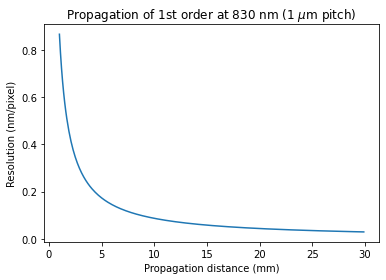

In [57]:
d = 1e-6 # 1 micron
m = 1 # diffraction order = 1
lambda_1 = 830e-9 # default: 830 nm
dlambda = 0.1e-9 # default: 0.1 nm
lambda_2 = lambda_1 + dlambda

theta1 = np.arcsin(m*lambda_1/d)
theta2 = np.arcsin(m*lambda_2/d)

L = np.arange(1e-3,3e-2, 1e-4) # 1 mm to 10 mm
w1 = L*np.tan(theta1)
w2 = L*np.tan(theta2)

pixelpitch = 5e-6 # 10 microns
numpix = (w2-w1)/pixelpitch
nmperPix = dlambda/numpix

plt.plot(L*1e3,nmperPix*1e9)
plt.xlabel('Propagation distance (mm)')
plt.ylabel('Resolution (nm/pixel)')
plt.title('Propagation of 1st order at 830 nm (1 $\mu$m pitch)')

print(nmperPix[-1]*1)


We see that, as expected, decreasing the pitch or increasing the propagation distance helps with spreading the light. 

### Incorporating non-idealities

The analysis so far assumed a single ray as the input.  In reality the entrance colimmated light has some width to it.  Let's assume we want 10x wider separation to help. 

In [85]:
d = 1e-6 # 1 micron
m = 1 # diffraction order = 1
lambda_1 = 830e-9 # default: 830 nm
dlambda = 0.1e-9 # default: 0.1 nm
lambda_2 = lambda_1 + dlambda

print('For 830 nm and 831 nm:')
theta1 = np.arcsin(m*lambda_1/d)
theta2 = np.arcsin(m*lambda_2/d)
print(np.degrees(theta1), np.degrees(theta2))

L = 10e-2 # 10 cm
w1 = L*np.tan(theta1)
w2 = L*np.tan(theta2)

print(w1*1e3, w2*1e3)

pixelpitch = 100e-6 # 100 microns
numpix = (w2-w1)/pixelpitch

print(numpix)

res = dlambda/numpix

print(res*1e9)

For 830 nm and 831 nm:
56.09873800313375 56.10901179053835
148.80861918262946 148.8662724379717
0.576532553422382
0.17345074342530237


We have to use a 10 cm focal length lens to get 100 micron separation between 0.2 nm.  Note this doesn't incorporate wave optics (airy disc, etc).


## Dual grating


Now let's try to understand the effect of adding a second grating. 

More generally at nonzero incidence it becomes:
$$ d \sin \theta_t - d \sin \theta_i = m \lambda $$

Let's calculate the new angles for 830 and 831 nm. 

### Direct comparison

If we use two of the same 1 micron gratings above, the diffraction angle becomes greater than 90\textdegree.  Still let's see the analysis.

<img src="img/dualGrating.png" alt="Drawing" style="width: 200px;"/>

In [73]:
d = 1e-6 # 1 micron
m = 1 # diffraction order = 1
lambda_1 = 830e-9 # default: 830 nm
dlambda = 0.1e-9 # default: 0.1 nm
lambda_2 = lambda_1 + dlambda
lambda_end = 850e-9 

print('For 830 nm and 831 nm:')
theta1 = np.arcsin(m*lambda_1/d)
theta2 = np.arcsin(m*lambda_2/d)
print(np.degrees(theta1), np.degrees(theta2))

gr2ang = theta1
theta1p = np.arcsin(m*lambda_1/d + np.sin(theta1-gr2ang) )
theta2p = np.arcsin(m*lambda_2/d + np.sin(theta2-gr2ang) )

theta1pt = theta1p+gr2ang
theta2pt = theta2p+gr2ang
print(np.degrees(theta1pt), np.degrees(theta2pt))

L = 1e-2 # 1 cm propagation

w1 = L*np.tan(theta1p-np.pi/2)
w2 = L*np.tan(theta2p-np.pi/2)

print(w1*1e3, w2*1e3)

pixelpitch = 5e-6 # 10 microns
numpix = (w2-w1)/pixelpitch

print(numpix)
res = 0.1/numpix

print('Resolution is  %f1.1' %res)

For 830 nm and 831 nm:
56.09873800313375 56.10901179053835
112.1974760062675 112.22617873838634
-6.720040851751486 -6.71277145657717
1.4538790348633464
Resolution is  0.0687821.1


So now we can decrease the resolution using this dual grating idea from 0.08 to 0.068 nm.  

Conclusions:
better separation from oblique angles (sin and tan relationships).

Cons: Very high diffracting angle, signal strength ignored, entrance slit considered <1 micron wide (not realistic)

### More realistic

<img src="img/dualdiffuser.png" alt="Drawing" style="width: 400px;"/>

In [93]:
d = 10e-6 # 1 micron
m = 1 # diffraction order = 1
lambda_1 = 830e-9 # default: 830 nm
dlambda = 0.1e-9 # default: 0.1 nm
lambda_2 = lambda_1 + dlambda
lambda_end = 850e-9 

print('For 830 nm and 831 nm at single grating:')
theta1 = np.arcsin(m*lambda_1/d)
theta2 = np.arcsin(m*lambda_2/d)
print(np.degrees(theta1), np.degrees(theta2))

L = 10e-2 # 1 cm propagation

w1 = L*np.tan(theta1)
w2 = L*np.tan(theta2)

print(w1*1e3, w2*1e3)

pixelpitch = 10e-6 # 10 microns
numpix = (w2-w1)/pixelpitch

print(numpix)
res = 0.1/numpix

print('Resolution is  %f1.1' %res)


print('For 830 nm and 831 nm at double grating:')

gr2ang =0
theta1p = np.arcsin(m*lambda_1/d + np.sin(theta1-gr2ang) )
theta2p = np.arcsin(m*lambda_2/d + np.sin(theta2-gr2ang) )

theta1pt = theta1p+gr2ang
theta2pt = theta2p+gr2ang
print(np.degrees(theta1pt), np.degrees(theta2pt))

L = 10e-2 # 1 cm propagation

w1 = L*np.tan(theta1pt)
w2 = L*np.tan(theta2pt)

print(w1*1e3, w2*1e3)

pixelpitch = 10e-6 # 10 microns
numpix = (w2-w1)/pixelpitch

print(numpix)
res = 0.1/numpix

print('Resolution is  %f1.1' %res)

For 830 nm and 831 nm at single grating:
4.761026859749839 4.761601801594109
8.328737917169246 8.329748341641121
0.10104244718752568
Resolution is  0.9896831.1
For 830 nm and 831 nm at double grating:
9.555331419848088 9.556493459824646
16.833552876728422 16.83563849737868
0.20856206502592453
Resolution is  0.4794741.1


So we can get <1 nm with two gratings of 10 micron feature size and 10 cm propagation.  This is a good starting point for our design. 

## Multiple gratings

Now let's try to understand how we can use multiple gratings to try to make the device more compact. 
Imagine that we have a narrow input slit of rays.  It hits a grating with micron sized features and diffracts.  Let's calculate the Frauhnhofer distance so we can use simple Fourier Transform pairs to estimate the diffraction patern. 

$$ z>>  \frac{k}{2}(x_1^2 + y_1^2) $$

Reference: Goodman, Intro to Fourier Optics

Here, z is the propagation distance. $x_1$ and $y_1$ refer to the size of the aperture.  Assuming the aperture is 10 micron wide and we're using 830 nm as our center, we get z~0.75 mm.  

In [27]:
lam = 800e-9
k = 2*np.pi/lam 
x1 = 10e-6
y1 = x1

z = k/2*(np.power(x1,2)+np.power(y1,2))
print(z*1e3)

0.7853981633974484


Text(0.5, 1.0, 'Fraunhofer limit')

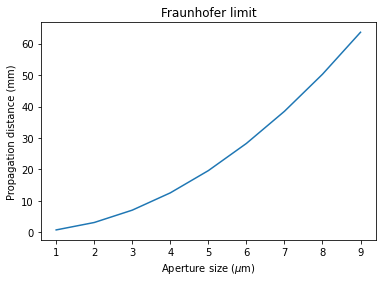

In [46]:
lam = 800e-9
k = 2*np.pi/lam 
x1 = np.arange(1e-6,10e-6,1e-6)
y1 = x1

M = 100 #greater than multiplier

z = M*k/2*(np.power(x1,2)+np.power(y1,2))
plt.plot(x1*1e6,z*1e3)
plt.xlabel('Aperture size ($\mu$m)')
plt.ylabel('Propagation distance (mm)')
plt.title('Fraunhofer limit')

Similar calculation, but now using the Fresnel Number.  $N_f$ = 0.01 

For Nf = 0.01, we have z = 3.1250 mm


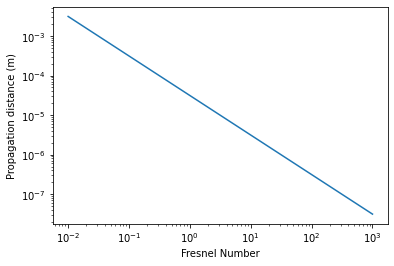

In [67]:
x1 = 10e-6
lam = 800e-9
Nf = np.arange(1e-2,1000, 1e-2)
z = np.power(x1/2,2)/(lam*Nf)
plt.loglog(Nf,z)
plt.xlabel('Fresnel Number')
plt.ylabel('Propagation distance (m)')

Nf = .01
z_01 = np.power(x1/2,2)/(lam*Nf)
print('For Nf = {0}, we have z = {1:#0.4f} mm'.format(Nf,z_01*1e3))

So for our calculations, we will assume 5 mm is enough separation between gratings with 10 micron feature size so we can use the sine equation to calculate the 1st order angle. 

Let's start with 1 grating and propagate far enough to get 0.1 nm resolution.

In [110]:
d = 10e-6 
m = 1 # diffraction order = 1
lambda_1 = 830e-9 # default: 830 nm
dlambda = 1e-9 # default: 0.1 nm
lambda_2 = lambda_1 + dlambda
L = 1000e-3 

print('For {0} nm and {1} nm and pitch = {2} micron:'.format(lambda_1*1e9, lambda_2*1e9, d*1e6))
theta1 = np.arcsin(m*lambda_1/d)
theta2 = np.arcsin(m*lambda_2/d)
print('1st order diffraction angles are respectively: {0:#0.4f} and {1:#0.4f} degrees'.format(np.degrees(theta1), np.degrees(theta2)))

w1 = L*np.tan(theta1)
w2 = L*np.tan(theta2)

print('After propagation {0} cm, we get the beam spots at x = {1:#0.4f} mm and {2:#0.4f} mm'.format(L*1e2,w1*1e3,w2*1e3))

pixelpitch =10e-6 # 10 microns
numpix = (w2-w1)/pixelpitch
res = dlambda/numpix
print('This gives us a resolution of {0:#0.4} nm'.format(res*1e9))

For 830.0 nm and 831.0 nm and pitch = 10.0 micron:
1st order diffraction angles are respectively: 4.7610 and 4.7668 degrees
After propagation 100.0 cm, we get the beam spots at x = 83.2874 mm and 83.3884 mm
This gives us a resolution of 0.09897 nm


Design results for 0.1 nm resolution:

10 micron feature size requires 1 m

1 micron feature size requires 2 cm

Now let's add more and more gratings. 

For 830.0 nm and 831.0 nm and pitch = 10.0 micron:
Grating # 1 is placed at 0 degrees angle
1st order diffraction angles are respectively: 9.5553 and 9.5670 degrees
After propagation 0.5 cm, we get the beam spots at x = 1.2581 mm and 1.2597 mm
This gives us a resolution of 19.79 nm
Grating # 2 is placed at 0 degrees angle
1st order diffraction angles are respectively: 9.5553 and 9.5670 degrees
After propagation 0.5 cm, we get the beam spots at x = 1.2581 mm and 1.2597 mm
This gives us a resolution of 6.460 nm
Grating # 3 is placed at 0 degrees angle
1st order diffraction angles are respectively: 9.5553 and 9.5670 degrees
After propagation 0.5 cm, we get the beam spots at x = 1.2581 mm and 1.2597 mm
This gives us a resolution of 3.126 nm
Grating # 4 is placed at 0 degrees angle
1st order diffraction angles are respectively: 9.5553 and 9.5670 degrees
After propagation 0.5 cm, we get the beam spots at x = 1.2581 mm and 1.2597 mm
This gives us a resolution of 1.791 nm
Grating # 5 is placed

Text(0, 0.5, 'Resolution (nm)')

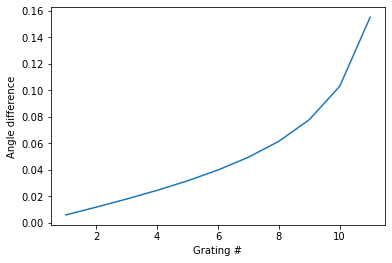

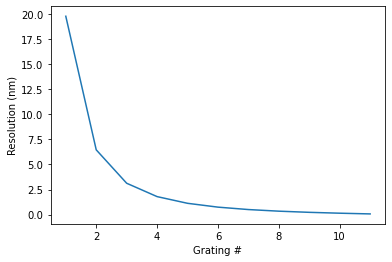

In [137]:
d = 10e-6 
m = 1 # diffraction order = 1
lambda_1 = 830e-9 # default: 830 nm
dlambda = 1e-9 # default: 0.1 nm
lambda_2 = lambda_1 + dlambda

L = 5e-3 
Ltot = L
N = 1
gr2ang = 0
print('For {0} nm and {1} nm and pitch = {2} micron:'.format(lambda_1*1e9, lambda_2*1e9, d*1e6))

w1 = 0
w2 = 0
theta1 = 0
theta2 = 0
nmax = 12

deltheta = np.zeros(nmax-1)
restrack = np.zeros(nmax-1)

narray =np.arange(1,nmax)

for N in np.arange(1,nmax):
    gr2ang =0
        
    print('Grating # {0} is placed at {1} degrees angle'.format(N, gr2ang))
    theta1 = np.arcsin(m*lambda_1/d + np.sin(theta1-gr2ang) )
    theta2 = np.arcsin(m*lambda_2/d + np.sin(theta2-gr2ang) )
    theta1 = theta1+gr2ang
    theta2 = theta2+gr2ang
    w1 = L*np.tan(theta1)+w1
    w2 = L*np.tan(theta2)+w2
    print('1st order diffraction angles are respectively: {0:#0.4f} and {1:#0.4f} degrees'.format(np.degrees(theta1pt), np.degrees(theta2pt)))
    print('After propagation {0} cm, we get the beam spots at x = {1:#0.4f} mm and {2:#0.4f} mm'.format(L*1e2,w1p*1e3,w2p*1e3))
    pixelpitch =10e-6 # 10 microns
    numpix = (w2-w1)/pixelpitch
    res = dlambda/numpix
    print('This gives us a resolution of {0:#0.4} nm'.format(res*1e9))

    #keep track of variables
    deltheta[N-1] = np.degrees(theta2-theta1)
    restrack[N-1] = res*1e9
    N = N+1
    Ltot = Ltot + L
        
print('The total propagation length is {0} cm'. format(Ltot*1e2))
plt.plot(narray,deltheta)
plt.xlabel('Grating #')
plt.ylabel('Angle difference')
plt.figure()
plt.plot(narray,restrack)
plt.xlabel('Grating #')
plt.ylabel('Resolution (nm)')

So now by using 10 gratings, we're able to cut down the propagation distance 20x.  But note the tradeoffs:
- lost power from diffraction orders (Ex: if efficiency = 80% then 0.8^10 = 10%)
- assumes input light is narrow slit (10 micron)


In [132]:
deltheta = np.zeros(nmax-1)

In [134]:
print(deltheta)



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
